<a href="https://colab.research.google.com/github/Kennedy216/Kennedy216/blob/main/covid19_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Load dataset

In [ ]:
df = pd.read_csv("/time_series_covid_19_deaths.csv")

In [ ]:
# Quick inspection

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
count,274.000000,274.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,...,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.00000,276.000000,276.000000
mean,20.447559,22.328281,0.061594,0.065217,0.094203,0.152174,0.202899,0.297101,0.474638,0.481884,...,12429.489130,12475.775362,12516.884058,12551.492754,12583.463768,12629.666667,12675.884058,12722.09058,12764.916667,12802.967391
std,25.189838,74.369096,1.023280,1.024830,1.446690,2.408778,3.131446,4.575682,7.524221,7.524725,...,52329.281871,52520.048682,52688.611368,52822.293448,52944.604575,53139.770636,53349.504820,53566.56119,53759.472266,53923.907434
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4.933349,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.750000,8.750000,8.750000,8.750000,8.750000,8.750000,8.750000,8.75000,8.750000,8.750000
50%,21.607878,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,242.500000,244.500000,246.500000,254.000000,255.500000,258.000000,259.000000,261.00000,264.500000,265.500000
75%,40.950592,83.380449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3486.000000,3489.750000,3495.750000,3495.750000,3505.000000,3512.500000,3515.500000,3517.25000,3522.500000,3526.000000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,588620.000000,589223.000000,589703.000000,589893.000000,590320.000000,590941.000000,591950.000000,593288.00000,593963.000000,594306.000000


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.isnull().sum()

,0
Province/State,190
Country/Region,0
Lat,2
Long,2
1/22/20,0
...,...
5/25/21,0
5/26/21,0
5/27/21,0
5/28/21,0


In [ ]:
df["Province/State"] = df["Province/State"].fillna("Unknown")

In [ ]:
date_cols = df.columns[4:]

df[date_cols] = df[date_cols].apply(pd.to_numeric, errors="coerce")

In [ ]:
df[date_cols] = df[date_cols].fillna(0)

In [ ]:
df = df.drop_duplicates()

In [ ]:
# Remove rows with missing country names
df = df[df["Country/Region"].notnull()]

In [ ]:
df = df[(df["Lat"].between(-100, 100)) & (df["Long"].between(-200, 200))]

In [ ]:
df_long = df.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    value_vars=date_cols,
    var_name="Date",
    value_name="Deaths"
)

In [ ]:
df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")

/tmp/ipython-input-3402704168.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")


In [ ]:
df_long = df_long.dropna(subset=["Date"])

In [ ]:
df_long = df_long.sort_values("Date")

In [ ]:
df_long["Deaths"] = df_long["Deaths"].clip(lower=0)


In [ ]:
df_long = (
    df_long
    .groupby(["Date", "Country/Region"], as_index=False)["Deaths"]
    .sum()
)


In [ ]:
global_trend = (
    df_long
    .groupby("Date")["Deaths"]
    .sum()
    .reset_index()
)


In [ ]:
# Create clean global time series

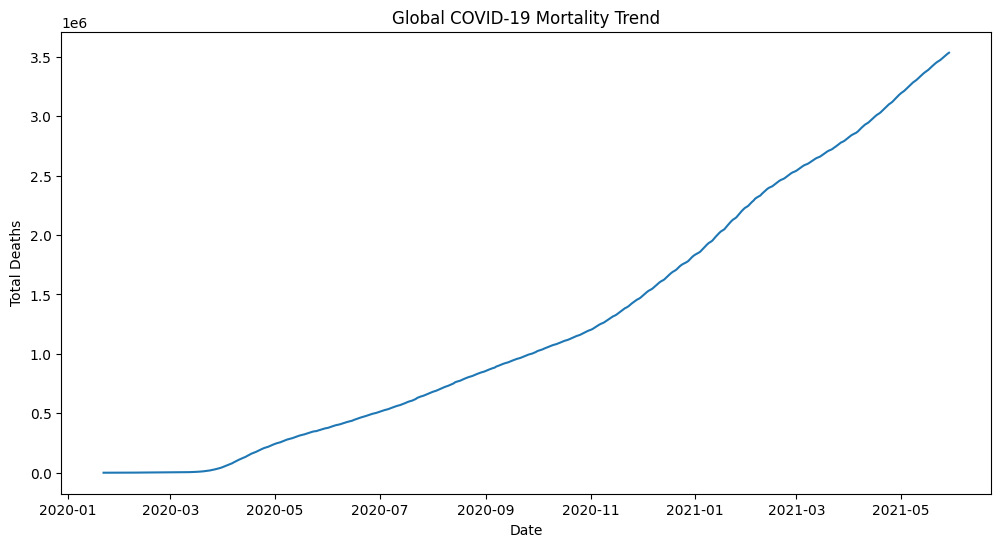

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(global_trend["Date"], global_trend["Deaths"])
plt.title("Global COVID-19 Mortality Trend")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.show()


In [ ]:
# Time-Series Forecasting of COVID-19 Death Trends

In [ ]:
# Prepare time series
ts = global_trend.set_index("Date")["Deaths"]

# Fit ARIMA model
model = ARIMA(ts, order=(2,1,2))
model_fit = model.fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

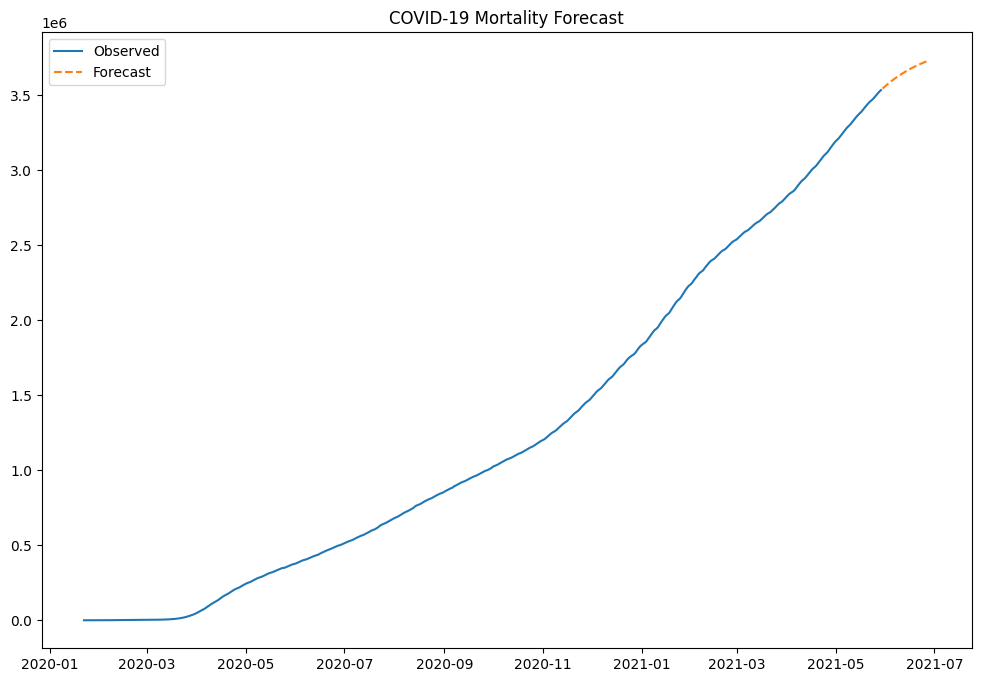

In [ ]:
# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(12,8))
plt.plot(ts, label="Observed")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.title("COVID-19 Mortality Forecast")
plt.legend()
plt.show()


In [ ]:
# Public Health Impact Assessment Using Time-Series Data

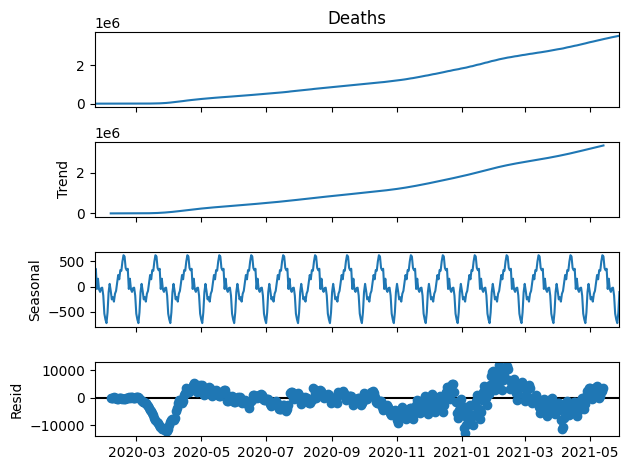

In [ ]:
decomposition = seasonal_decompose(ts, model="additive", period=30)

decomposition.plot()
plt.show()


In [ ]:
# global deaths (7-day average)

In [ ]:
global_trend["Deaths_7day_avg"] = global_trend["Deaths"].rolling(7).mean()

In [ ]:
# Detect peaks (waves)

In [ ]:
from scipy.signal import find_peaks

In [ ]:
# Find peaks (tune distance if needed)
peaks, _ = find_peaks(
    global_trend["Deaths_7day_avg"].dropna(),
    distance=30  # roughly one month between waves
)

In [ ]:
# Visualize detected waves

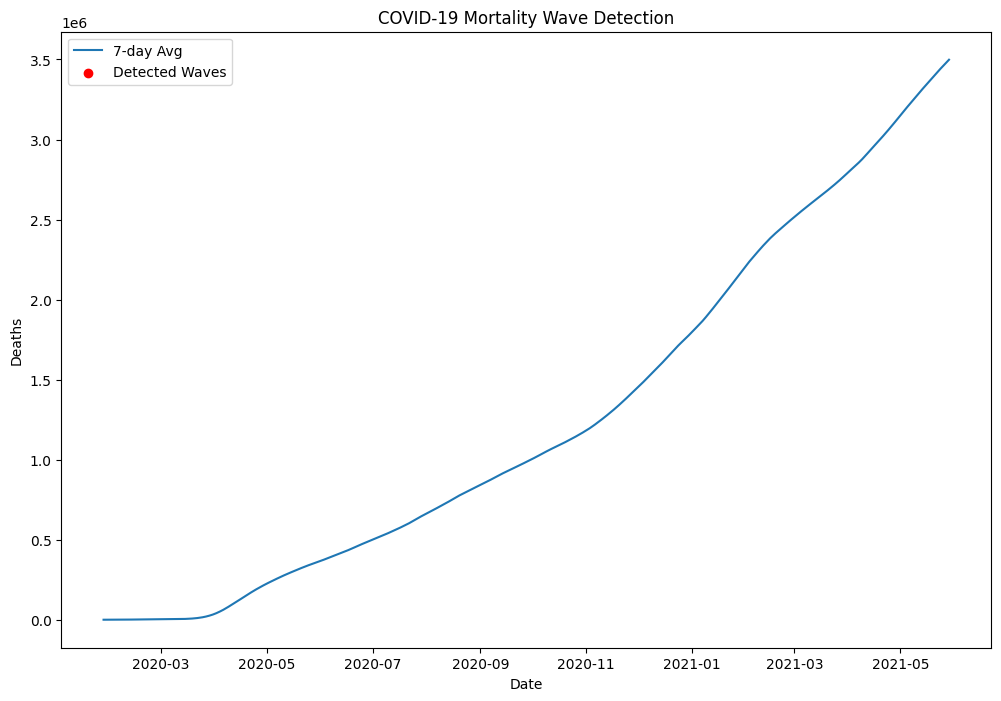

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(global_trend["Date"], global_trend["Deaths_7day_avg"], label="7-day Avg")
plt.scatter(
    global_trend["Date"].iloc[peaks],
    global_trend["Deaths_7day_avg"].iloc[peaks],
    color="red",
    label="Detected Waves"
)

plt.title("COVID-19 Mortality Wave Detection")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.show()


In [ ]:
# REGIONAL TREND DECOMPOSITION

In [ ]:
country = "Germany"

In [ ]:
# Aggregate deaths for that country

In [ ]:
country_data = (
    df_long[df_long["Country/Region"] == country]
    .groupby("Date")["Deaths"]
    .sum()
    .reset_index()
)

In [ ]:
# Convert to time series

In [ ]:
country_ts = country_data.set_index("Date")["Deaths"]

In [ ]:
# Decompose the regional trend

In [ ]:
decomposition_country = seasonal_decompose(
    country_ts,
    model="additive",
    period=25
)

In [ ]:
# Plot decomposition

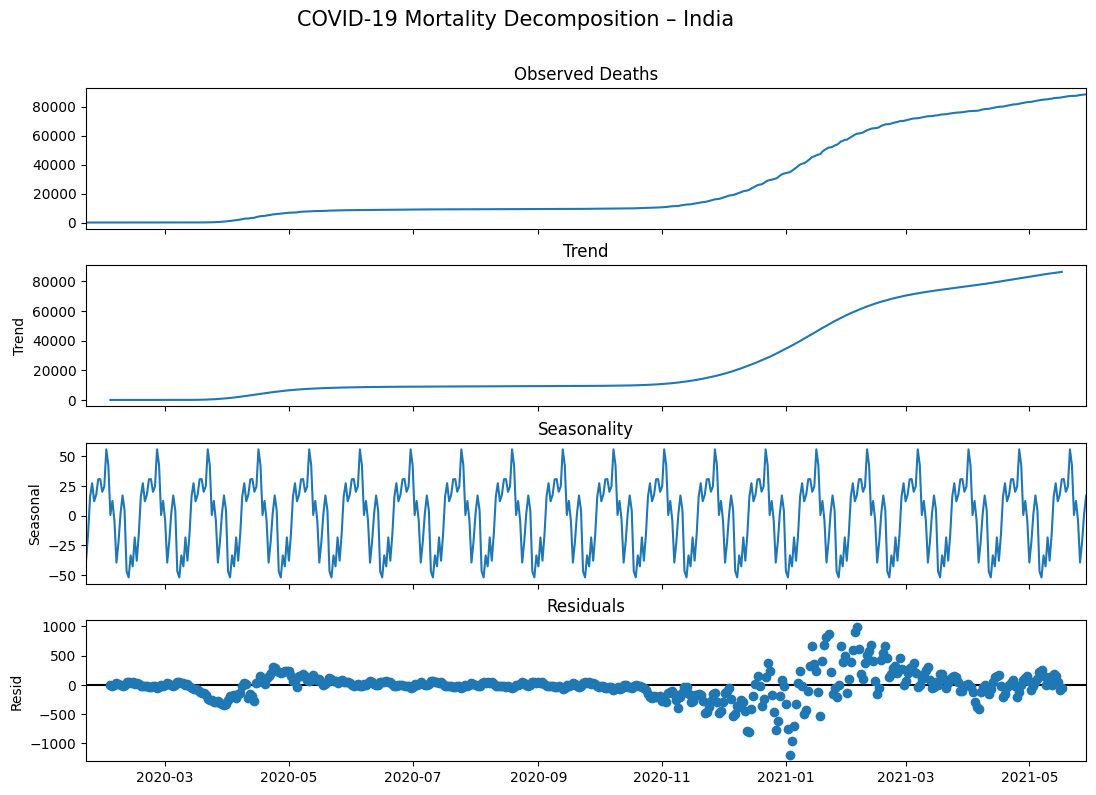

In [ ]:
fig = decomposition_country.plot()
fig.set_size_inches(12, 8)

titles = ["Observed Deaths", "Trend", "Seasonality", "Residuals"]

for ax, title in zip(fig.axes, titles):
    ax.set_title(title)

fig.suptitle(
    f"COVID-19 Mortality Decomposition – {country}",
    fontsize=15,
    y=1.02
)

plt.show()


In [ ]:
# Compare multiple regions

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


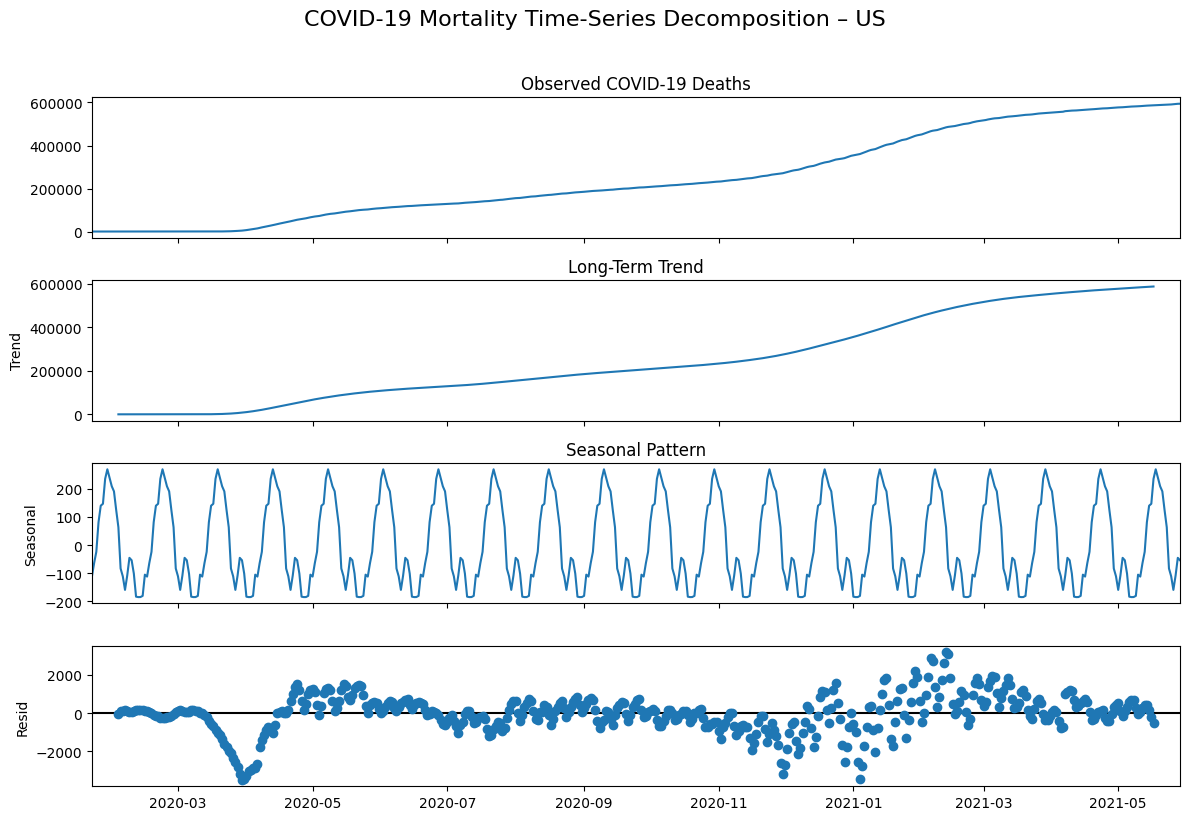

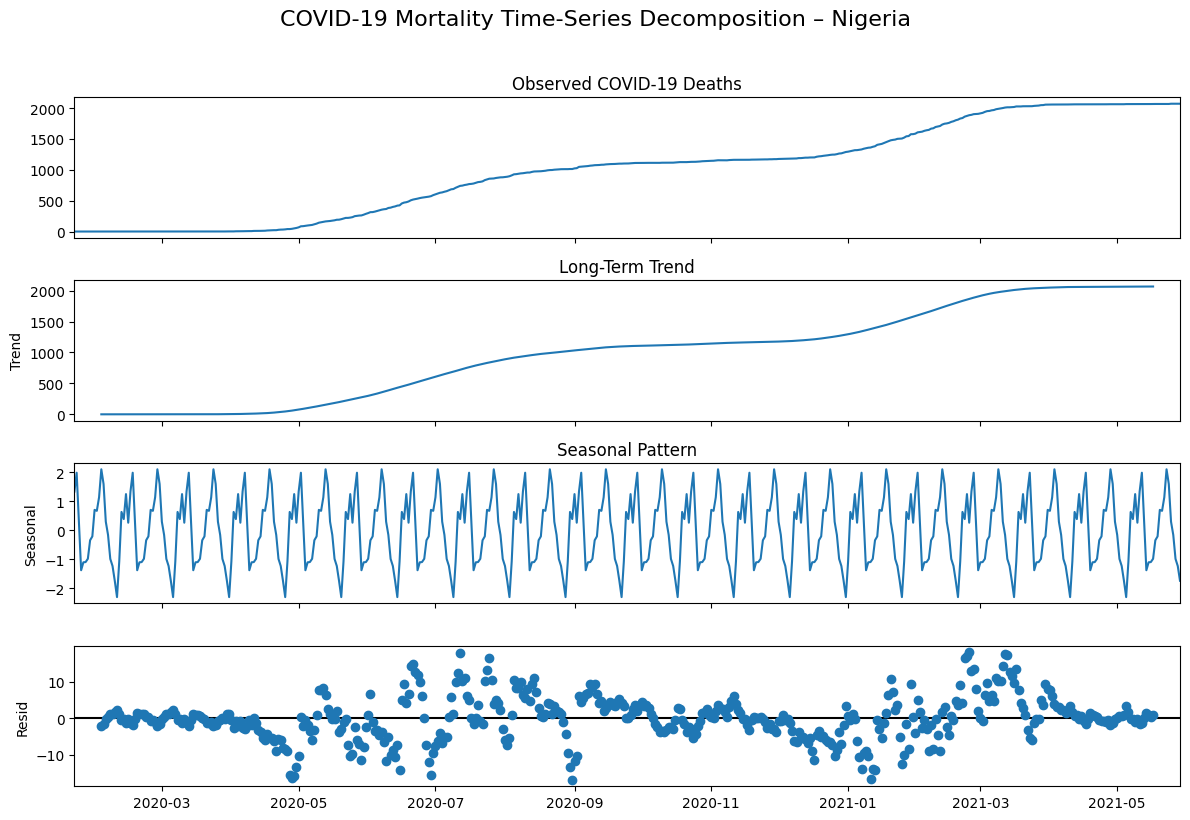

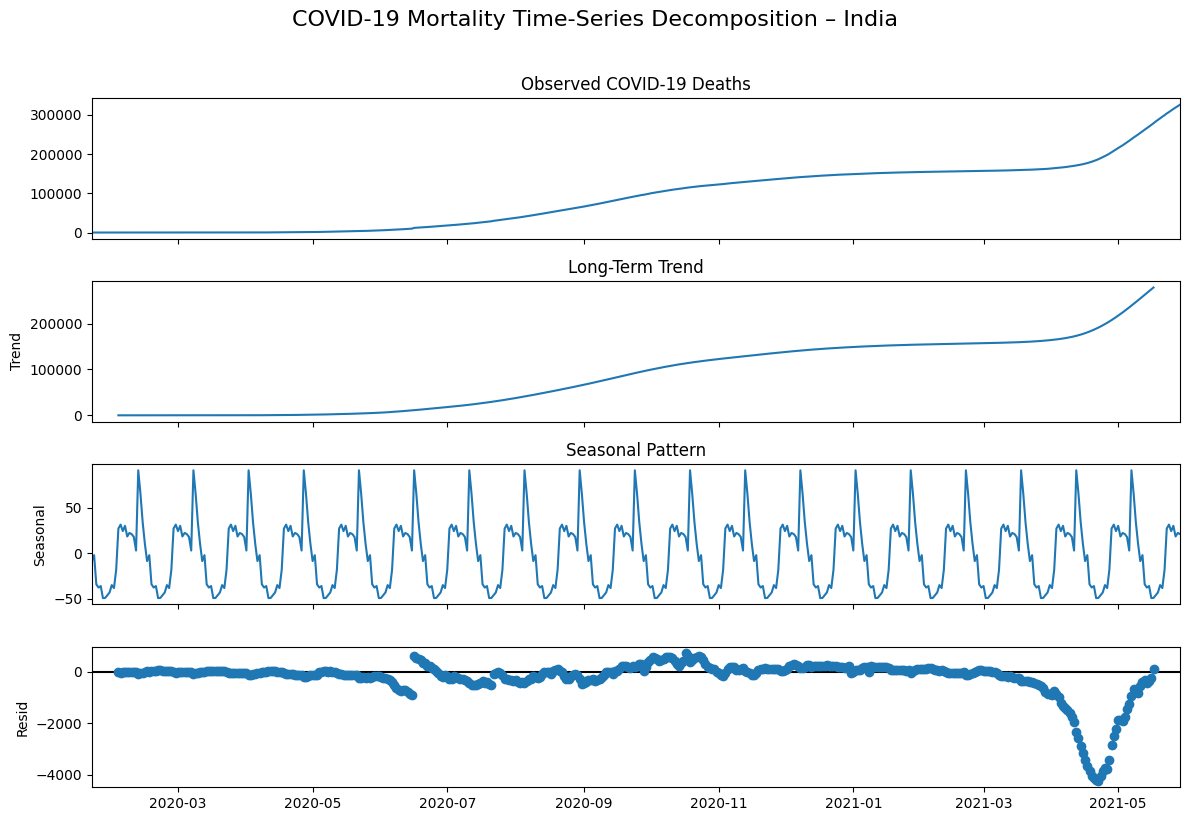

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

countries = ["US", "Nigeria", "India"]

for country in countries:
    ts = (
        df_long[df_long["Country/Region"] == country]
        .groupby("Date")["Deaths"]
        .sum()
    )

    decomposition = seasonal_decompose(ts, model="additive", period=25)

    fig = decomposition.plot()
    fig.set_size_inches(12, 8)

    # Rename subplot titles for clarity
    subplot_titles = [
        "Observed COVID-19 Deaths",
        "Long-Term Trend",
        "Seasonal Pattern",
    ]

    for ax, title in zip(fig.axes, subplot_titles):
        ax.set_title(title)

    # Main caption (clear & professional)
    fig.suptitle(
        f"COVID-19 Mortality Time-Series Decomposition – {country}",
        fontsize=16,
        y=1.02
    )

    plt.tight_layout()
    plt.show()
